In [21]:
import os
import numpy as np
import cv2 as cv
import pickle
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib import pyplot as plt


In [31]:

# Load and preprocess images
TrainPath = r'G:\\Coding\\python\\UTS KB\\tugas1\\Train'
categories = os.listdir(TrainPath)


data = []

for category in categories:
    label = categories.index(category)
    path = os.path.join(TrainPath, category)
    for img in os.listdir(path):
        imgPath = os.path.join(path, img)
        try:
            imgArray = cv.imread(imgPath)
            imgResized = cv.resize(imgArray, (100, 100))
            image = np.array(imgResized).flatten()
            data.append([image, label])
            print("success load image from ", imgPath)
        except Exception as e:
            print("error load image from ", imgPath)
            pass


success load image from  G:\\Coding\\python\\UTS KB\\tugas1\\Train\Alfaraby\IMG-20241204-WA0135.jpg
success load image from  G:\\Coding\\python\\UTS KB\\tugas1\\Train\Alfaraby\IMG-20241204-WA0137.jpg
success load image from  G:\\Coding\\python\\UTS KB\\tugas1\\Train\Alfaraby\IMG-20241204-WA0140.jpg
success load image from  G:\\Coding\\python\\UTS KB\\tugas1\\Train\Alfaraby\IMG-20241204-WA0142.jpg
success load image from  G:\\Coding\\python\\UTS KB\\tugas1\\Train\Alfaraby\IMG-20241204-WA0144.jpg
success load image from  G:\\Coding\\python\\UTS KB\\tugas1\\Train\Alfaraby\IMG-20241204-WA0146.jpg
success load image from  G:\\Coding\\python\\UTS KB\\tugas1\\Train\Alfaraby\IMG-20241204-WA0148.jpg
success load image from  G:\\Coding\\python\\UTS KB\\tugas1\\Train\Alfaraby\IMG-20241204-WA0150.jpg
success load image from  G:\\Coding\\python\\UTS KB\\tugas1\\Train\Alfaraby\IMG-20241204-WA0152.jpg
success load image from  G:\\Coding\\python\\UTS KB\\tugas1\\Train\Alfaraby\IMG-20241204-WA0154.jpg


In [32]:

# Save data to pickle file
with open('dataImage.pickle', 'wb') as pick:
    pickle.dump(data, pick)
print("success save data image")


success save data image


In [2]:

# Load data from pickle file
with open('dataImage.pickle', 'rb') as pick:
    data = pickle.load(pick)


In [33]:

# Separate features and labels
features = []
labels = []

for feature, label in data:
    features.append(feature)
    labels.append(label)


In [34]:

# Convert features and labels to numpy arrays
features = np.array(features)
labels = np.array(labels)


In [40]:

# Split data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size=0.1)


In [36]:

# Train the model
model = SVC(C=1, kernel='poly', gamma='auto')
model.fit(xtrain, ytrain)

print("Model training completed")

Model training completed


In [37]:
pick = open('model.sav', 'wb')
pickle.dump(model, pick)
pick.close()
print("Model saved")  

Model saved


In [6]:
pick = open('model.sav', 'rb')
model = pickle.load(pick)
pick.close()
print("Model loaded")

Model loaded


Model accuracy:  0.9285714285714286
Prediction:  Hasby Ashidiq


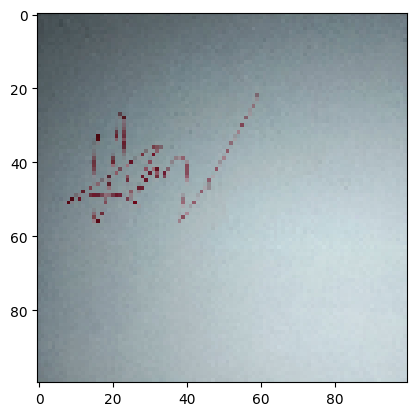

In [41]:
categories = os.listdir(TrainPath)
predict = model.predict(xtest)
accuracy = model.score(xtest, ytest)
print("Model accuracy: ", accuracy)
print("Prediction: ", categories[predict[0]])

mySign = xtest[0].reshape(100, 100, 3)
plt.imshow(mySign, cmap='gray')
plt.show()
